<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/air-quality-time-series/blob/master/Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

**Creating Dataframe**


*   Combining Date & Time
*   Dropping Empty Columns
*   Formatting to Date-Time format
*   Replacing ',' with '.'



In [0]:
dataframe=pd.read_csv('https://raw.githubusercontent.com/AnirbanMukherjeeXD/air-quality-time-series/master/AirQualityUCI.csv',delimiter=';',nrows=9357)

#Combining Date and Time
dataframe['Date'] = dataframe['Date'].map(str) + " "+dataframe['Time']

#Dropping empty columns, and only Time column
dataframe=dataframe.drop(['Time','Unnamed: 15','Unnamed: 16'],axis=1)

#Formatting Date-Time
dataframe['Date']=pd.to_datetime(dataframe['Date'],format='%d/%m/%Y %H.%M.%S')
dataframe=dataframe.rename(columns={'Date':'Date-Time'})

In [34]:
#Replacing ',' with '.'
dataframe['CO(GT)']=dataframe['CO(GT)'].str.replace(",",".").astype(float)
dataframe['C6H6(GT)']=dataframe['C6H6(GT)'].str.replace(",",".").astype(float)
dataframe['T']=dataframe['T'].str.replace(",",".").astype(float)
dataframe['RH']=dataframe['RH'].str.replace(",",".").astype(float)
dataframe['AH']=dataframe['AH'].str.replace(",",".").astype(float)
dataframe.head()

Date-Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0 2004-03-10 18:00:00     2.6         1360       150      11.9           1046   
1 2004-03-10 19:00:00     2.0         1292       112       9.4            955   
2 2004-03-10 20:00:00     2.2         1402        88       9.0            939   
3 2004-03-10 21:00:00     2.2         1376        80       9.2            948   
4 2004-03-10 22:00:00     1.6         1272        51       6.5            836   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0      166          1056      113          1692         1268  13.6  48.9   
1      103          1174       92          1559          972  13.3  47.7   
2      131          1140      114          1555         1074  11.9  54.0   
3      172          1092      122          1584         1203  11.0  60.0   
4      131          1205      116          1490         1110  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888

**Exploring the dataset**

In [0]:
dataframe.dtypes

Date-Time        datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)               int64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)             int64
NOx(GT)                   int64
PT08.S3(NOx)              int64
NO2(GT)                   int64
PT08.S4(NO2)              int64
PT08.S5(O3)               int64
T                       float64
RH                      float64
AH                      float64
dtype: object

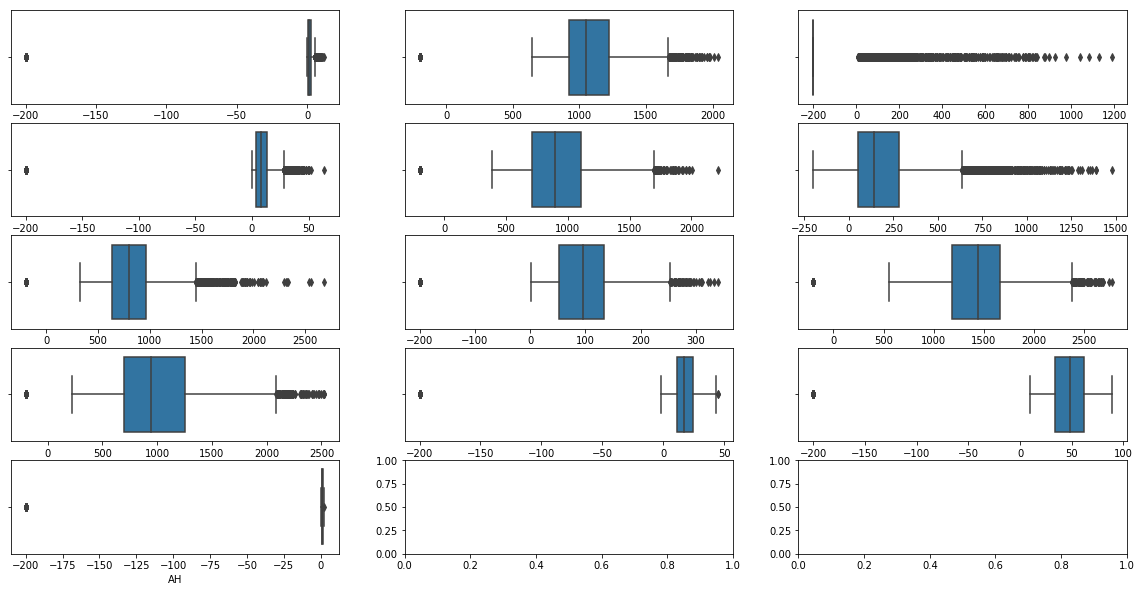

In [35]:
fig, ax = plt.subplots(5, 3, figsize=(20, 10))
i,j=0,0
for col in dataframe.columns[1:]:
    sns.boxplot(dataframe[col],ax=ax[i,j])
    j=j+1
    if(j%3==0):
        i=i+1
        j=0

*Seems like unknown values are written as -200*

In [36]:
#Changing all occurences of -200 to the previous values
for col in dataframe.columns:
  for i in range(len(dataframe[col].values)):
    if(dataframe[col].values[i]==-200):
      dataframe[col].values[i]=dataframe[col].values[i-1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
dataframe.corr(method='spearman').style.background_gradient(cmap='coolwarm')

*['PT08.S2(NMHC)'] and ['C6H6(GT)'] are highly correlated*

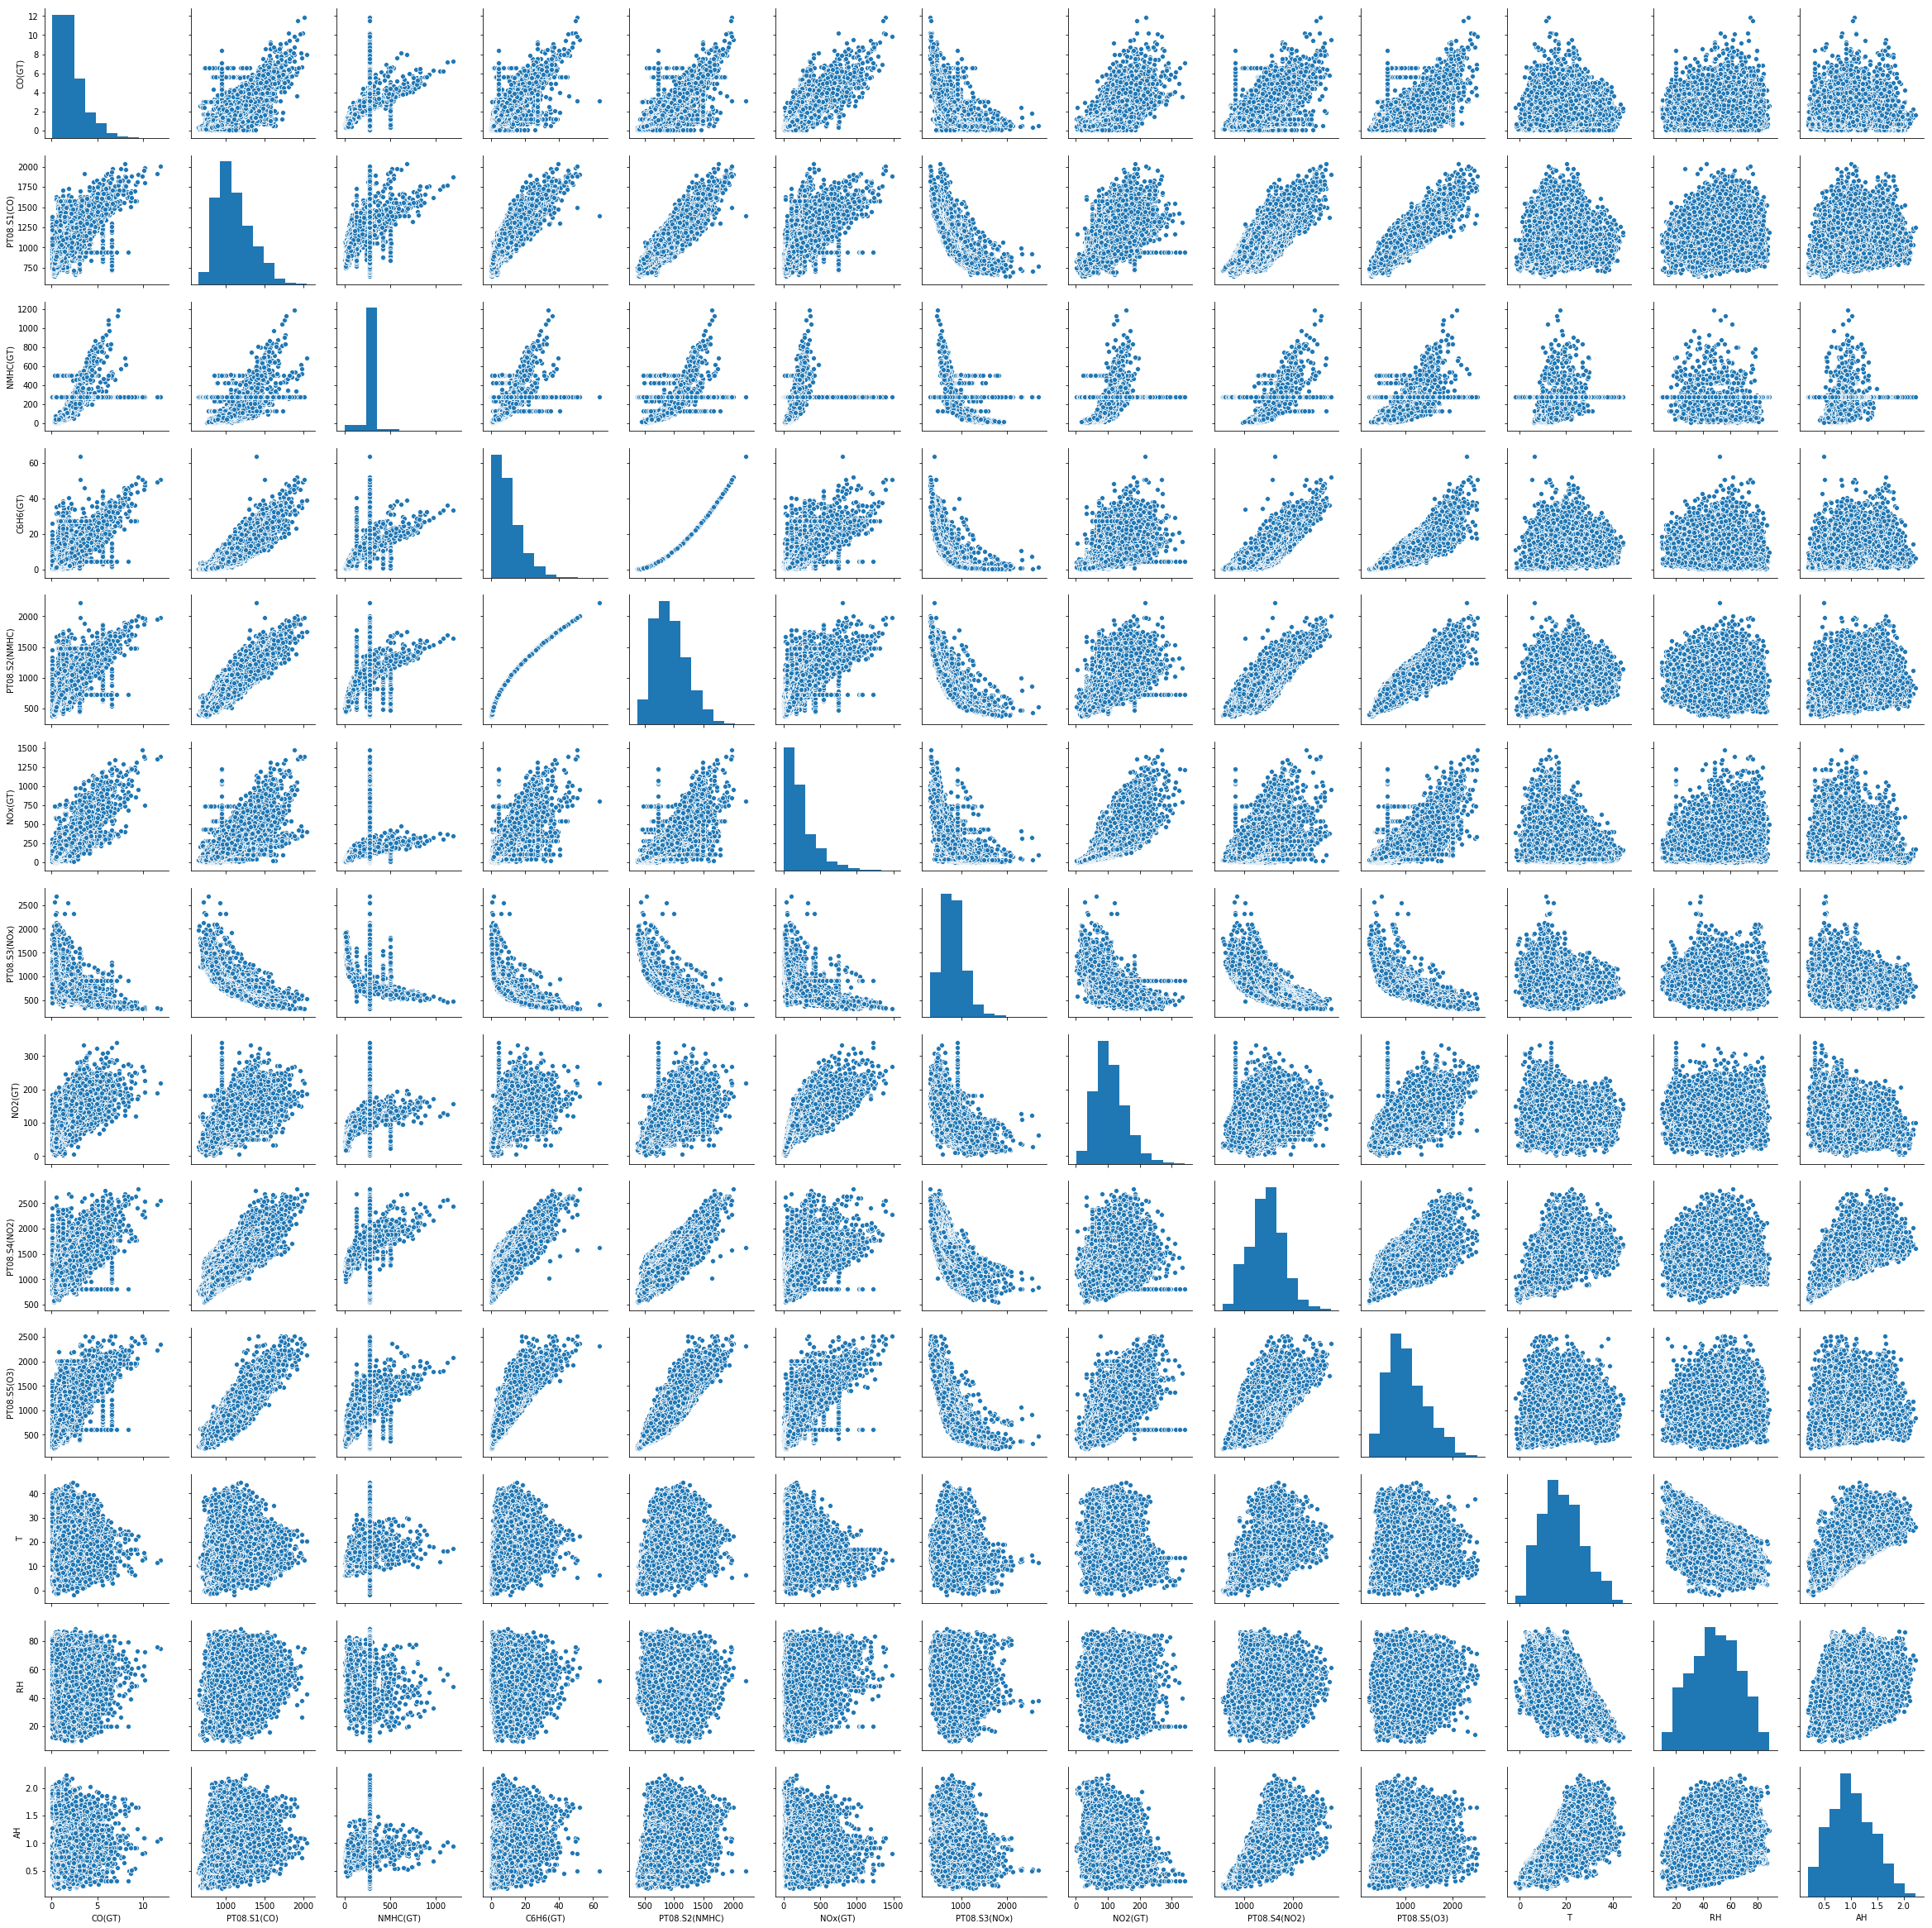

In [37]:
sns.pairplot(dataframe)

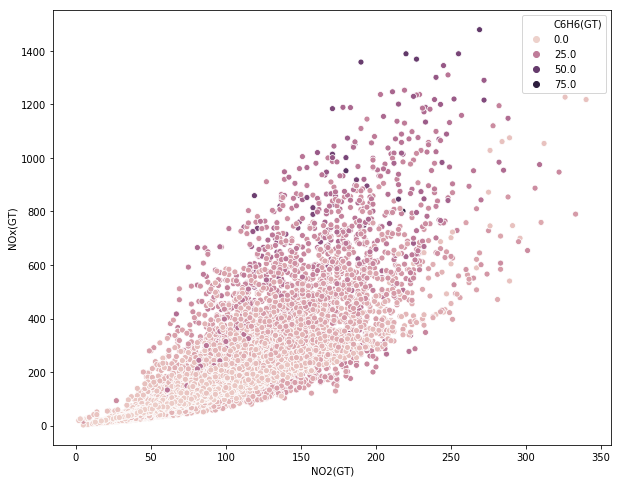

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot(dataframe['NO2(GT)'],dataframe['NOx(GT)'],hue=dataframe['C6H6(GT)'],cmap='coolwarm')

In [0]:
pd.DatetimeIndex(dataframe['Date-Time']).year

Float64Index([2004.0, 2004.0, 2004.0, 2004.0, 2004.0, 2004.0, 2004.0, 2004.0,
              2004.0, 2004.0,
              ...
              2005.0, 2005.0, 2005.0, 2005.0, 2005.0, 2005.0, 2005.0, 2005.0,
              2005.0,    nan],
             dtype='float64', name='Date', length=9358)

##Time Series Plots

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Benzene Level')

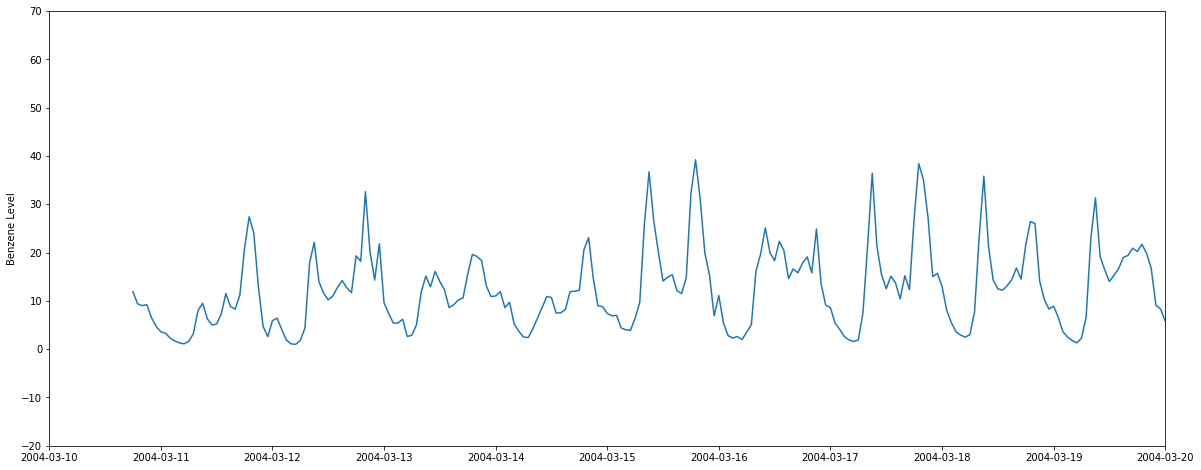

In [0]:
##BENZENE

plt.figure(figsize=(20,8))
#plt.plot((pd.DatetimeIndex(df['Date-Time']).day)*24+pd.DatetimeIndex(df['Date-Time']).hour,df['C6H6(GT)'])
plt.plot(dataframe['Date-Time'],dataframe['C6H6(GT)'])
plt.xlim(pd.Timestamp('2004-03-10'), pd.Timestamp('2004-03-20'))
plt.ylim(-20,70)
plt.ylabel("Benzene Level")

Text(0, 0.5, 'Benzene Level')

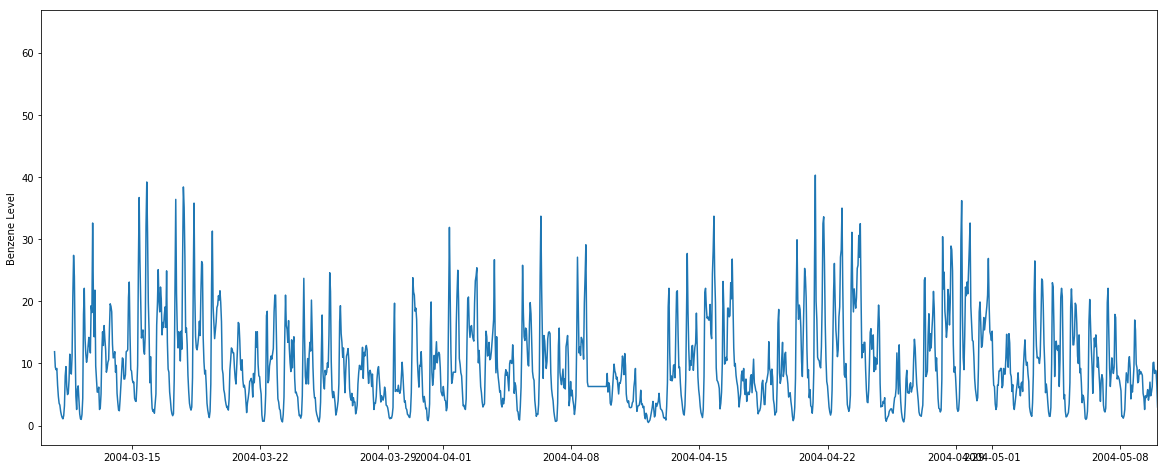

In [25]:
plt.figure(figsize=(20,8))
plt.plot(dataframe['Date-Time'],dataframe['C6H6(GT)'])
plt.xlim(pd.Timestamp('2004-03-10'), pd.Timestamp('2004-05-10'))
plt.ylabel("Benzene Level")

(-250, 800)

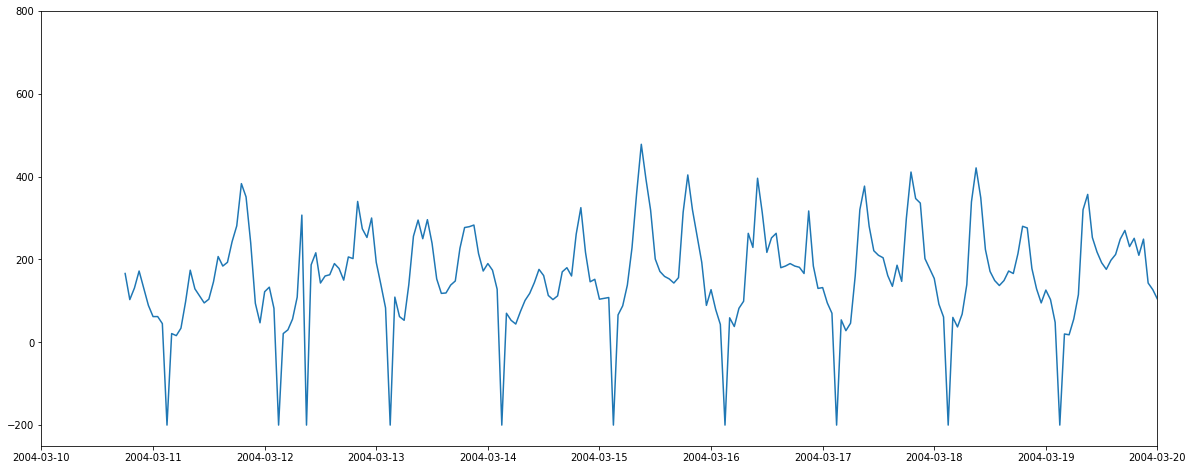

In [0]:
##NOx(GT)

plt.figure(figsize=(20,8))
plt.plot(dataframe['Date-Time'],dataframe['NOx(GT)'])
plt.xlim(pd.Timestamp('2004-03-10'), pd.Timestamp('2004-03-20'))
plt.ylim(-250,800)

(-250, 700)

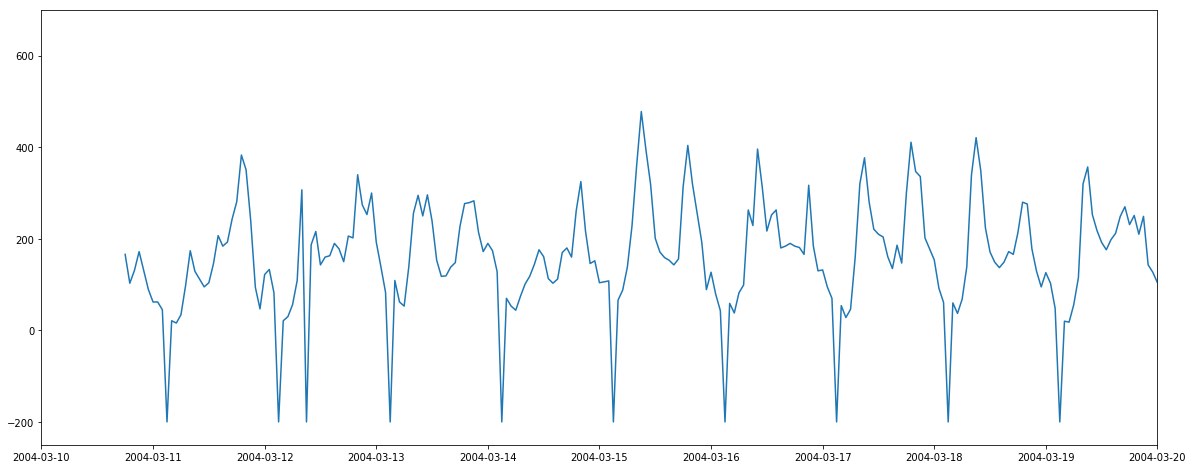

In [0]:
plt.figure(figsize=(20,8))
df=dataframe.iloc[0:(24*9),:]
plt.plot(dataframe['Date-Time'],dataframe['NOx(GT)'])
plt.xlim(pd.Timestamp('2004-03-10'), pd.Timestamp('2004-03-20'))
plt.ylim(-250,700)

##Model Selection##

**Extracting a short portion of dataset**

In [0]:
df=dataframe.iloc[0:(24*9),:]
X=(pd.DatetimeIndex(df['Date-Time']).day.values*24+pd.DatetimeIndex(df['Date-Time']).hour.values).reshape(-1,1)
Y=df['C6H6(GT)'].values

##SUPPORT VECTOR REGRESSOR

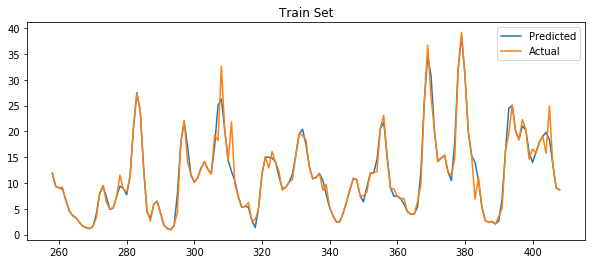

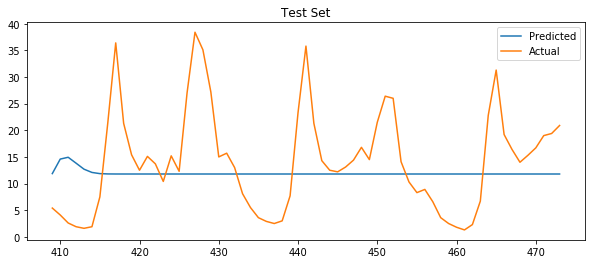

In [42]:
from sklearn.svm import SVR
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,shuffle=False)
model=SVR(kernel='rbf',C=1e3,gamma=0.1).fit(X_train,Y_train)

plt.figure(figsize=(10,4))
#plt.subplot(1,2,1)
plt.plot(X_train,model.predict(X_train))
plt.plot(X_train,Y_train)
plt.legend(['Predicted','Actual'])
plt.title('Train Set')
plt.show()

plt.figure(figsize=(10,4))
#plt.subplot(1,2,2)
plt.plot(X_test,model.predict(X_test))
plt.plot(X_test,Y_test)
plt.legend(['Predicted','Actual'])
plt.title('Test Set')
plt.show()

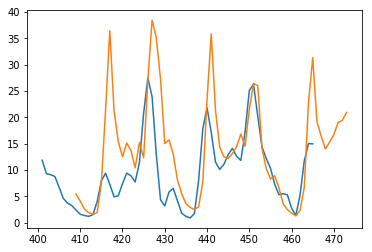

In [43]:
plt.plot(X_test-8,model.predict(X_train[:65]))
plt.plot(X_test,Y_test)

##LSTM

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from numpy import array
from keras.models import load_model

 **SHORT SAMPLE**

**Preparing the Data**

*For LSTM, X has to be 3D vector*

Turning data to lag based matrix:

In [46]:
lag=3
YN=np.array([[j for j in Y[i:i+lag]] for i in range(0,len(Y)-lag+1)])
YN

(171, 2) (171, 1) (43, 2) (43, 1)


Selecting X and Y columns:

In [0]:
xx,yy=YN[:,[0,1]],YN[:,[2]]

Splitting into Training & Testing set:

In [0]:
xx,xxt,yy,yyt=train_test_split(xx,yy,test_size=0.2,shuffle=None)
print(xx.shape,yy.shape,xxt.shape,yyt.shape)

Reshaping X into 3D vector:

In [0]:
xx=xx.reshape(xx.shape[0],xx.shape[1],1)
xxt=xxt.reshape(xxt.shape[0],xxt.shape[1],1)

In [49]:
model = Sequential()
model.add(LSTM(10, input_shape=(2,1)))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam',metrics=['mse'])


history=model.fit(xx, yy, epochs=500, shuffle=False,validation_split=0.2, verbose=2)

Train on 136 samples, validate on 35 samples
Epoch 1/500
 - 2s - loss: 221.1759 - mean_squared_error: 221.1759 - val_loss: 235.8693 - val_mean_squared_error: 235.8693
Epoch 2/500
 - 0s - loss: 218.9760 - mean_squared_error: 218.9760 - val_loss: 233.5875 - val_mean_squared_error: 233.5875
Epoch 3/500
 - 0s - loss: 216.8779 - mean_squared_error: 216.8779 - val_loss: 231.4490 - val_mean_squared_error: 231.4490
Epoch 4/500
 - 0s - loss: 214.9456 - mean_squared_error: 214.9456 - val_loss: 229.4766 - val_mean_squared_error: 229.4766
Epoch 5/500
 - 0s - loss: 213.1803 - mean_squared_error: 213.1803 - val_loss: 227.6629 - val_mean_squared_error: 227.6629
Epoch 6/500
 - 0s - loss: 211.5491 - mean_squared_error: 211.5491 - val_loss: 225.9683 - val_mean_squared_error: 225.9683
Epoch 7/500
 - 0s - loss: 210.0161 - mean_squared_error: 210.0161 - val_loss: 224.3660 - val_mean_squared_error: 224.3660
Epoch 8/500
 - 0s - loss: 208.5508 - mean_squared_error: 208.5508 - val_loss: 222.8248 - val_mean_squ

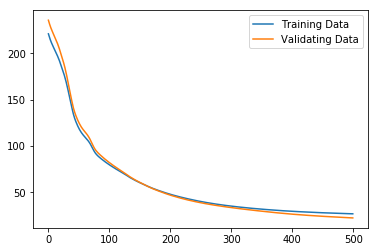

In [51]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.legend(['Training Data','Validating Data'])

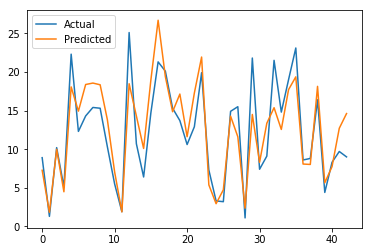

In [0]:
plt.plot(yyt)
plt.plot(model.predict(xxt))
plt.legend(['Actual','Predicted'])

**FULL BENZENE DATA**

In [0]:
Y=dataframe['C6H6(GT)'].values
lag=3
YN=np.array([[j for j in Y[i:i+lag]] for i in range(0,len(Y)-lag+1)])
xx,yy=YN[:,[0,1]],YN[:,[2]]
xx,xxt,yy,yyt=train_test_split(xx,yy,test_size=0.2,shuffle=None)
xx=xx.reshape(xx.shape[0],xx.shape[1],1)
xxt=xxt.reshape(xxt.shape[0],xxt.shape[1],1)

In [0]:
model = Sequential()
model.add(LSTM(10, input_shape=(2,1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam',metrics=['mse'])

In [0]:
#FOR LOADING WEIGHTS DIRECTLY
model.load_weights("LSTM_AirPollution.h5")

In [61]:
history=model.fit(xx, yy, epochs=500, shuffle=False, validation_split=0.2, verbose=2)

Train on 5987 samples, validate on 1497 samples
Epoch 1/500
 - 3s - loss: 147.6281 - mean_squared_error: 147.6281 - val_loss: 119.6429 - val_mean_squared_error: 119.6429
Epoch 2/500
 - 1s - loss: 94.5417 - mean_squared_error: 94.5417 - val_loss: 72.7406 - val_mean_squared_error: 72.7406
Epoch 3/500
 - 1s - loss: 64.3661 - mean_squared_error: 64.3661 - val_loss: 54.9954 - val_mean_squared_error: 54.9954
Epoch 4/500
 - 1s - loss: 51.4410 - mean_squared_error: 51.4410 - val_loss: 45.1377 - val_mean_squared_error: 45.1377
Epoch 5/500
 - 1s - loss: 44.0461 - mean_squared_error: 44.0461 - val_loss: 38.5654 - val_mean_squared_error: 38.5654
Epoch 6/500
 - 1s - loss: 38.0557 - mean_squared_error: 38.0557 - val_loss: 33.7447 - val_mean_squared_error: 33.7447
Epoch 7/500
 - 1s - loss: 34.3178 - mean_squared_error: 34.3178 - val_loss: 30.1072 - val_mean_squared_error: 30.1072
Epoch 8/500
 - 1s - loss: 31.4095 - mean_squared_error: 31.4095 - val_loss: 27.3270 - val_mean_squared_error: 27.3270
Epoc

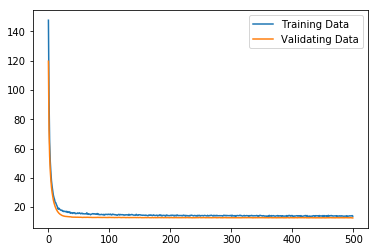

In [66]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.legend(['Training Data','Validating Data'])

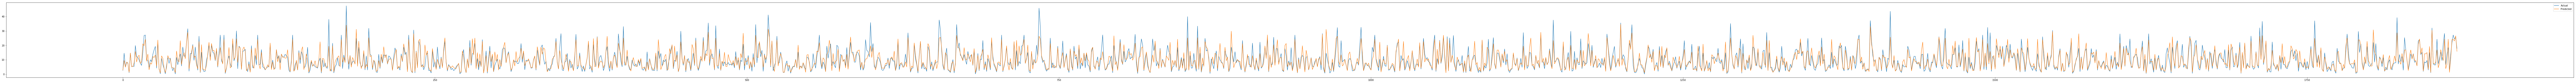

In [67]:
plt.figure(figsize=(200,6))
plt.plot(yyt)
plt.plot(model.predict(xxt))
plt.legend(['Actual','Predicted'])

In [0]:
model.save_weights("LSTM_AirPollution.h5")